## Лобораторная работа №4

### Седов Артем 20ИВТ3


Информация о Наборе данных: Набор данных содержит 9568 точек данных, собранных с электростанции комбинированного цикла за 6 лет (2006-2011), когда электростанция была настроена на работу с полной нагрузкой. Характеристики состоят из среднечасовых переменных температуры окружающей среды (T), давления окружающей среды (AP), относительной влажности (RH) и вакуума выхлопных газов (V) для прогнозирования чистой почасовой выработки электроэнергии (EP) установки.

Электростанция с комбинированным циклом (ПГУ) состоит из газовых турбин (ГТ), паровых турбин (СТ) и парогенераторов с рекуперацией тепла. В ПГУ электроэнергия вырабатывается газовыми и паровыми турбинами, которые объединены в одном цикле, и передается от одной турбины к другой. В то время как вакуум отсоединяется от пара и воздействует на него Турбина, остальные три переменные окружающей среды влияют на производительность GT. Для сравнения с нашими базовыми исследованиями и для того, чтобы можно было проводить статистические тесты 5x2 раза, мы предоставляем данные , перетасованные пять раз. Для каждой перетасовки выполняется 2-кратное CV, и полученные 10 измерений используются для статистического тестирования. Мы предоставляем данные как в форматах .ods, так и в форматах .xlsx.

Атрибутивная информация: Функции состоят из среднечасовых переменных окружающей среды

#### Температура (T) в диапазоне от 1,81°C до 37,11°C,
#### Давление окружающей среды (AP) в диапазоне 992,89-1033,30 милибар,
#### Относительная влажность (RH) в диапазоне от 25,56% до 100,16%
#### Разрежение выхлопных газов (V) в диапазоне 25,36-81,56 см рт. ст.
#### Чистая почасовая выработка электроэнергии (EP) 420,26-495,76 МВт
#### Средние значения берутся с различных датчиков, расположенных вокруг установки, которые ежесекундно регистрируют  переменные окружающей среды. Переменные даны без нормализации.

In [1]:
import copy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn as sk
import copy as copy
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error
%matplotlib inline

df = pd.read_excel('Folds5x2_pp.xlsx')
df = df.rename(columns={'AT':'Температура', 'V':'Разряженность', 'AP':'Давление', 'RH':'Влажность', 'PE':'Выработка'})
df

,Температура,Разряженность,Давление,Влажность,Выработка
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [2]:
print('Original size: ', len(df))
original = len(df)
df.drop_duplicates(inplace = True)
df.dropna()
print('Final size: ', len(df))
final = len(df)
print('Difference:', original - final)

Original size:  9568
Final size:  9527
Difference: 41


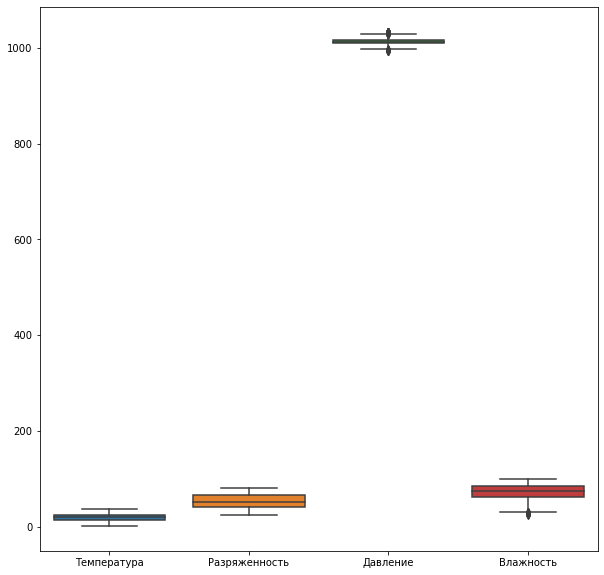

In [3]:
data_copy=df.drop(columns = ['Выработка'])
plt.figure(figsize=(10, 10))
sns.boxplot(data=data_copy)
plt.show()

<AxesSubplot:>

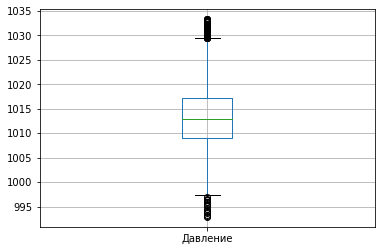

In [4]:
df.boxplot(column = ['Давление'])

In [5]:
from sklearn import preprocessing
df_normal = preprocessing.normalize(data_copy, axis=0, norm = 'max')
df_normal = pd.DataFrame(df_normal)
df_normal.columns = ['Температура', 'Разряженность', 'Давление', 'Влажность']
df_normal

,Температура,Разряженность,Давление,Влажность
0,0.403126,0.512016,0.991067,0.730531
1,0.678523,0.771947,0.987167,0.589856
2,0.137699,0.483080,0.979541,0.919928
3,0.562113,0.702795,0.977683,0.765176
4,0.291566,0.459784,0.976706,0.964657
...,...,...,...,...
9522,0.448666,0.609245,0.981332,0.908546
9523,0.355430,0.480383,0.990680,0.666733
9524,0.843977,0.911354,0.980277,0.364217
9525,0.659660,0.851520,0.981186,0.622903


In [6]:
from sklearn import preprocessing
df_normal = preprocessing.normalize(data_copy, axis=0, norm = 'max')
df_normal = pd.DataFrame(df_normal)
df_normal.columns = ['Температура', 'Разряженность', 'Давление', 'Влажность']
df_normal

,Температура,Разряженность,Давление,Влажность
0,0.403126,0.512016,0.991067,0.730531
1,0.678523,0.771947,0.987167,0.589856
2,0.137699,0.483080,0.979541,0.919928
3,0.562113,0.702795,0.977683,0.765176
4,0.291566,0.459784,0.976706,0.964657
...,...,...,...,...
9522,0.448666,0.609245,0.981332,0.908546
9523,0.355430,0.480383,0.990680,0.666733
9524,0.843977,0.911354,0.980277,0.364217
9525,0.659660,0.851520,0.981186,0.622903


<AxesSubplot:>

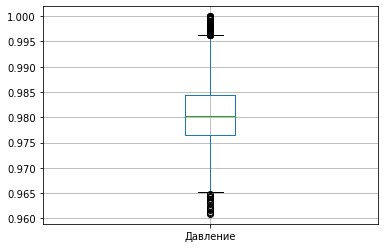

In [7]:
df_normal.boxplot(column = ['Давление'])

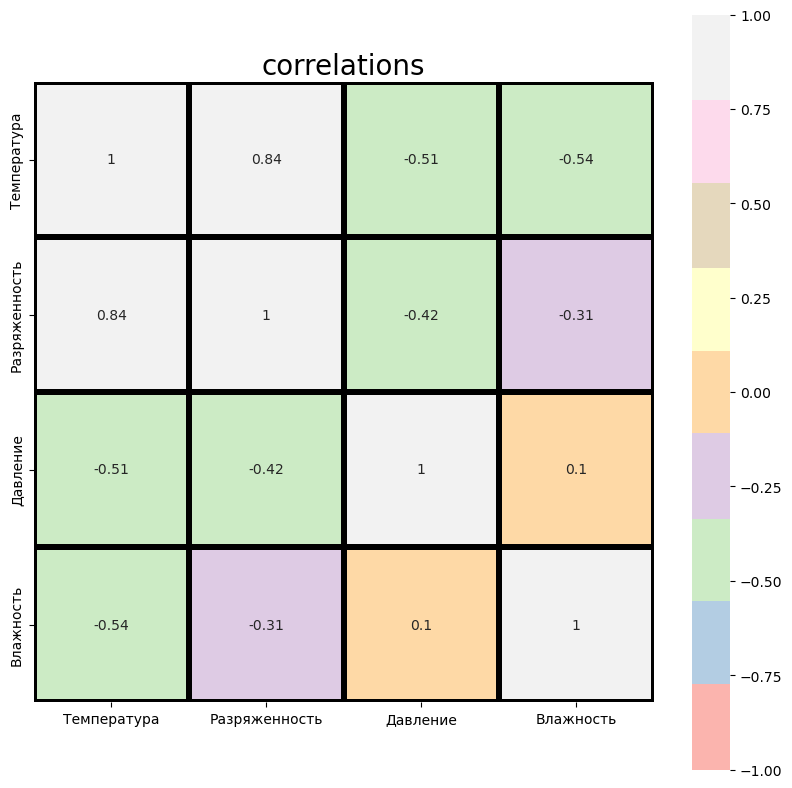

,Температура,Разряженность,Давление,Влажность
Температура,1.000000,0.843689,-0.508222,-0.543947
Разряженность,0.843689,1.000000,-0.415718,-0.312214
Давление,-0.508222,-0.415718,1.000000,0.101631
Влажность,-0.543947,-0.312214,0.101631,1.000000


In [10]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10), dpi= 100)
sns.heatmap(df_normal.corr(), xticklabels=df_normal.corr().columns, yticklabels=df_normal.corr().columns, annot = True, vmin=-1, vmax=1, center= 0, linewidths=3, linecolor='black', square=True, cmap='Pastel1')
plt.title('correlations', fontsize=20)
plt.show()

df_normal.corr()

In [11]:
df_normal.isnull().sum()

Температура      0
Разряженность    0
Давление         0
Влажность        0
dtype: int64

In [12]:
x, y = df_normal, df['Выработка']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [13]:
LR = LinearRegression()
LR.fit(x_train, y_train)
predict_LR = LR.predict(x_test)

person_PR, pvalue_pearson_PR = pearsonr(predict_LR, y_test)
spermen_PR, pvalue_spermen_PR = spearmanr(predict_LR, y_test)
print('Пирсон: ', person_PR)
print('pvalue: ', pvalue_pearson_PR)
print('Спирмен: ', spermen_PR)
print('pvalue: ', pvalue_spermen_PR)
print('Cредняя абсолютная ошибка = %8.5f' %mean_absolute_error(predict_LR, y_test))

Пирсон:  0.9641071654981428
pvalue:  0.0
Спирмен:  0.9629585541154344
pvalue:  0.0
Cредняя абсолютная ошибка =  3.63040


In [14]:
#RIDGE регуляризатор
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)

print('Среднеквадратичная ошибка: {:.3f}, test: {:.3f}'.format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('Коэффициент детерминации: {:.3f}, test: {:.3f}'.format(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))


Среднеквадратичная ошибка: 20.812, test: 20.754
Коэффициент детерминации: 0.928, test: 0.929


In [15]:
person_PR, pvalue_pearson_PR = pearsonr(y_test_pred, y_test)
spermen_PR, pvalue_spermen_PR = spearmanr(y_test_pred, y_test)
print('Пирсон: ', person_PR)
print('pvalue: ', pvalue_pearson_PR)
print('Спирмен: ', spermen_PR)
print('pvalue: ', pvalue_spermen_PR)

Пирсон:  0.9640812423135869
pvalue:  0.0
Спирмен:  0.9628078673142895
pvalue:  0.0


In [16]:
RigeModel = Ridge(alpha=0.1)
RigeModel.fit(x_train, y_train)
RigeModel.score(x_test, y_test)

0.9293775040894633

In [17]:
RigeModel = Ridge(alpha=0.01)
RigeModel.fit(x_train, y_train)
RigeModel.score(x_test, y_test)

0.9294323255163114

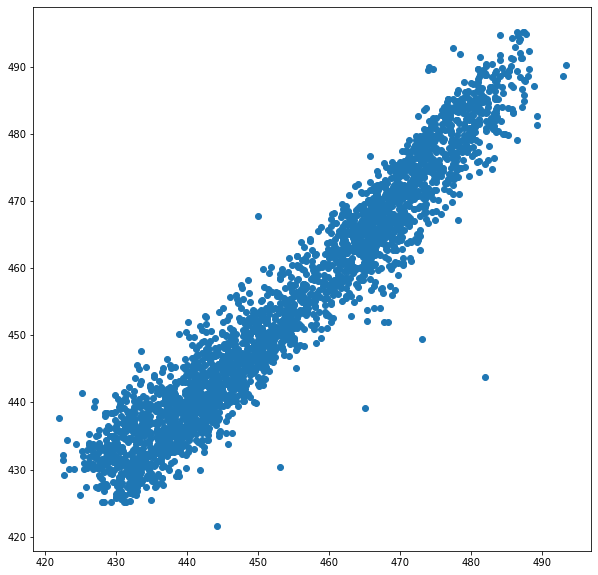

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(RigeModel.predict(x_test), y_test)